In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
import numpy as np
import math
import seaborn
import statsmodels.api as sm
random.seed(123)
np.random.seed(123)

In [19]:
df1 = pd.read_csv('../data/books_25_pages_clean0.csv',skipinitialspace=True)
df1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_reference_percent,genre_relationships_percent,genre_religion_percent,genre_science_percent,genre_self-help_percent,genre_spirituality_percent,genre_womens_percent,genre_writing_percent,ratings_per_month_since_published,reviews_per_month_since_published
0,/book/show/46674.Feeling_Good,David D. Burns,4.03,24430,1980.0,Feeling Good,1022.0,5.99,0,0,...,0.013122,0.000000,0.000000,0.013122,0.298643,0.000000,0.0,0.0,50.895833,2.129167
1,/book/show/347852.The_Road_Less_Traveled,M. Scott Peck,4.06,83161,1978.0,The Road Less Traveled,2388.0,13.99,0,0,...,0.000000,0.009898,0.020696,0.000000,0.196461,0.100180,0.0,0.0,165.001984,4.738095
2,/book/show/129603.You_Can_Heal_Your_Life,Louise L. Hay,4.16,63058,1984.0,You Can Heal Your Life,1892.0,9.99,0,0,...,0.011027,0.000000,0.000000,0.000000,0.374347,0.123622,0.0,0.0,145.967593,4.379630
3,/book/show/1052.The_Richest_Man_in_Babylon,George S. Clason,4.26,108129,1926.0,The Richest Man in Babylon,5851.0,1.99,0,0,...,0.000000,0.000000,0.000000,0.000000,0.137849,0.000000,0.0,0.0,95.859043,5.187057
4,/book/show/26329.Emotional_Intelligence,Daniel Goleman,4.02,81740,1995.0,Emotional Intelligence,2831.0,14.99,0,0,...,0.000000,0.000000,0.000000,0.044663,0.120174,0.000000,0.0,0.0,272.466667,9.436667


In [20]:
# create training and testing dataframes
num_half = int(len(df1.index)/2)
print(num_half)
df_train = df1.sample(frac=1).head(n=num_half)
df_validate = df1.sample(frac=1).tail(n=num_half)

190


In [21]:
# select predictors
features = ['kindle_price']
features.extend(list(df1.columns[252:-2]))

# for i in range(0,len(list(df1.columns))):
#     print(i,list(df1.columns)[i])


In [22]:
# build linear regression model
X_train = df_train[features]
y_train = df_train['reviews_per_month_since_published']
X_validate = df_validate[features]
y_validate = df_validate['reviews_per_month_since_published']
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_validate = regr.predict(X_validate)
print('rmse validation',math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
print('rsq validation',r2_score(y_validate, y_pred_validate))
print('rmse training',math.sqrt(mean_squared_error(y_train, regr.predict(X_train))))
print('rsq training',r2_score(y_train, regr.predict(X_train)))

rmse validation 2.509023251657133
rsq validation 0.04055483161454665
rmse training 1.9898150290077532
rsq training 0.465667120171518


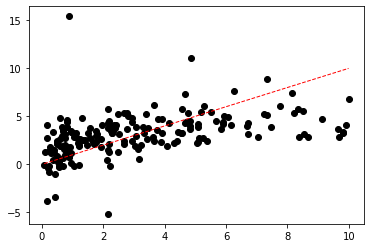

In [23]:
plt.scatter(y_validate,y_pred_test,  color='black')
# plt.plot(X_validate, y_pred_test, color='blue', linewidth=3)
plt.plot(sorted(y_validate,key=float), sorted(y_validate,key=float),'--', linewidth=1,color='red')
# plt.xticks(())
# plt.yticks(())

plt.show()


In [26]:
regr.intercept_


array([ 1.06898956e-01, -1.96065810e+01,  3.30564746e+00,  4.77205641e+01,
       -1.57156637e+01, -1.47381988e+00, -1.71912652e+01,  4.23774287e+00,
       -3.68809725e+00, -1.99333832e+01, -7.61680848e-02, -3.97848591e+01,
        2.44084939e+01,  2.98393279e+01,  2.20095970e+01, -4.77949494e+00,
        7.58223185e+00, -1.38714788e+01,  3.29785192e+01, -8.95621342e+01,
        1.78404570e+01,  3.63714561e+00,  4.09857743e+00, -1.27142298e+01,
        9.42927420e+00,  1.47734003e+01, -1.01921187e+01,  5.91159021e+00,
        1.15385417e+01,  4.87861417e+00,  3.31822072e+01,  8.54078396e+00,
       -3.40079909e+00,  1.30649675e+01,  6.94506638e+00,  1.47983326e+01,
        1.69686828e+02,  1.32694146e+01,  2.27570845e+01,  4.28660858e+00,
        4.59799048e+00, -1.77323710e+01,  1.16754717e+01,  5.74734996e+00,
        2.19238777e+00, -5.65363224e+00,  3.22718237e+00,  2.41286038e+01,
        5.30851858e+00])

In [25]:
ols = sm.OLS(y_train,X_train)
ols_result = ols.fit()
ols_result.summary()

# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# fig, ax = plt.subplots(figsize=(8,6))
# fig = plot_leverage_resid2(ols_result, ax = ax)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     reviews_per_month_since_published   R-squared (uncentered):                   0.798
Model:                                           OLS   Adj. R-squared (uncentered):              0.728
Method:                                Least Squares   F-statistic:                              11.40
Date:                               Thu, 24 Sep 2020   Prob (F-statistic):                    4.35e-30
Time:                                       20:35:48   Log-Likelihood:                         -400.80
No. Observations:                                190   AIC:                                      899.6
Df Residuals:                                    141   BIC:                                      1059.
Df Model:                                         49                                                  
Covariance Type:                           nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
kindle_price                           0.0928      0.053      1.748      0.083      -0.012       0.198
genre_adult_percent                  -17.6316     34.606     -0.509      0.611     -86.045      50.782
genre_art_percent                      0.3682     11.921      0.031      0.975     -23.198      23.934
genre_audiobook_percent               45.9220     13.643      3.366      0.001      18.950      72.894
genre_biography_percent              -20.1029     23.555     -0.853      0.395     -66.670      26.464
genre_buddhism_percent                -4.3094      5.040     -0.855      0.394     -14.274       5.655
genre_buisness_percent               -18.5875     37.110     -0.501      0.617     -91.952      54.777
genre_business_percent                 1.1649      4.636      0.251      0.802      -8.000      10.330
genre_christian_percent               -8.2004     13.934     -0.589      0.557     -35.747      19.347
genre_classics_percent               -24.2457     17.775     -1.364      0.175     -59.386      10.895
genre_communication_percent           -3.5314     11.545     -0.306      0.760     -26.355      19.292
genre_counselling_percent            -44.9503     35.014     -1.284      0.201    -114.171      24.270
genre_economics_percent               20.1017     22.735      0.884      0.378     -24.845      65.048
genre_education_percent               27.9198     17.014      1.641      0.103      -5.716      61.555
genre_entrepreneurship_percent        17.6522     20.583      0.858      0.393     -23.039      58.343
genre_essays_percent                 -10.8149     25.715     -0.421      0.675     -61.651      40.021
genre_faith_percent                    6.0345     28.508      0.212      0.833     -50.324      62.394
genre_feminism_percent               -17.4782     15.308     -1.142      0.255     -47.742      12.785
genre_fiction_percent                 29.7010     11.548      2.572      0.011       6.871      52.531
genre_finance_percent                -87.3387    101.317     -0.862      0.390    -287.636     112.959
genre_food_percent                    14.3208     12.764      1.122      0.264     -10.912      39.554
genre_health_percent                   0.0785      4.384      0.018      0.986      -8.589       8.746
genre_how-to_percent                  -0.3344     31.390     -0.011      0.992     -62.390      61.721
genre_humor_percent                  -13.5123     17.021     -0.794      0.429     -47.162      20.138
genre_inspirational_percent           